### <b> Title:</b> Performing Market Mix Modeling on an advertising data.
##### We have collected the data from an advertising firm which tells us how many dollars were spend on different platforms through advertising.

We are going to analyze the data graphically and numerically to understand that which platform have given us more returns, which platform is stable and monotonous. Finally, we will be performing an optimisation process to check the spending ratios, when advertising dollar has been contrained.

For this project, we’re going to use a  dataset that consists of marketing spend on TV, radio, and Social media, as well as the corresponding dollar sales by period.

## Market Mix Modeling
Marketing mix modeling (MMM) is a statistical analysis such as multivariate regressions on sales and marketing time series data to estimate the impact of various marketing tactics (marketing mix) on sales and then forecast the impact of future sets of tactics. It seeks to determine how much success was generated by each factor, and forecast what future success can be created through altering and optimising the marketing mix.

- <b>The key purpose</b>:
By estimating the effectiveness of different marketing channels activities, MMM helps to better understand how various marketing activities are driving the business metrics of a product and increase ROI (Return on investment).

MMM is similar to the concept of 4Ps of the marketing mix: Product, Price, Place, Promotion. It’s a fundamental part of marketing theory that considers what factors are required for a business to succeed.


# Data Preparation and Data Transformation:
The industry standard typically will pick a <b>weekly time period</b>. This is because monthly data granularity is too long and daily level data has too much variation which leads to poor accuracy. Therefore, aggregate data at a weekly level is the best practice for creating a MMM model.

# Benefits of Marketing Mix Modelling
- Enables marketers to prove the ROI (Return of Investment) of their efforts
- Returns insights that allow for effective budget allocation
- Facilitates superior sales trend forecasting


# Setup
First, we’re going to import the libraries and read the data, as usual.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# Reading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Market Mix Modeling/MMM.xlsx",parse_dates=['Date'],index_col='Date')
df1.head()

,TV,Radio,Social_Media,Influencer,Sales
Date,,,,,
2001-01-01,54,14.119060,4.215642,Nano,324.905658
2001-01-02,65,26.217056,5.481302,Macro,370.511432
2001-01-03,67,16.705375,2.657608,Macro,389.325067
2001-01-04,73,31.327127,10.260554,Nano,412.936802
2001-01-05,28,17.343639,2.071636,Micro,214.546227


In [ ]:
df1.shape

(4552, 5)

In [ ]:
df1.Influencer.value_counts()

Mega     1154
Micro    1149
Nano     1136
Macro    1113
Name: Influencer, dtype: int64

There are 1154 Mega, 1149 Micro, 1136 Nano and 1113 Macro influencers present in this dataset

# Checking for Null values

In [ ]:
df1.isnull().sum()

TV              0
Radio           0
Social_Media    0
Influencer      0
Sales           0
dtype: int64

Since there are no null values in the dataset, we’re going to look at the variables in the dataset and understand what we’re working with.

In [ ]:
df1.describe()

,TV,Radio,Social_Media,Sales
count,4552.000000,4552.000000,4552.000000,4552.000000
mean,54.061731,17.133978,2.948103,296.080006
std,26.113084,9.171342,2.007434,105.271088
min,10.000000,0.000684,0.000031,64.148547
25%,32.000000,9.789495,1.370759,208.432141
50%,53.000000,16.828186,2.664381,290.405681
75%,77.000000,24.085183,4.186680,379.831712
max,100.000000,48.871161,13.981662,545.871974



# Checking Correlation

<ipython-input-8-ba169190c504>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),cmap='magma',annot=True)


<Axes: >

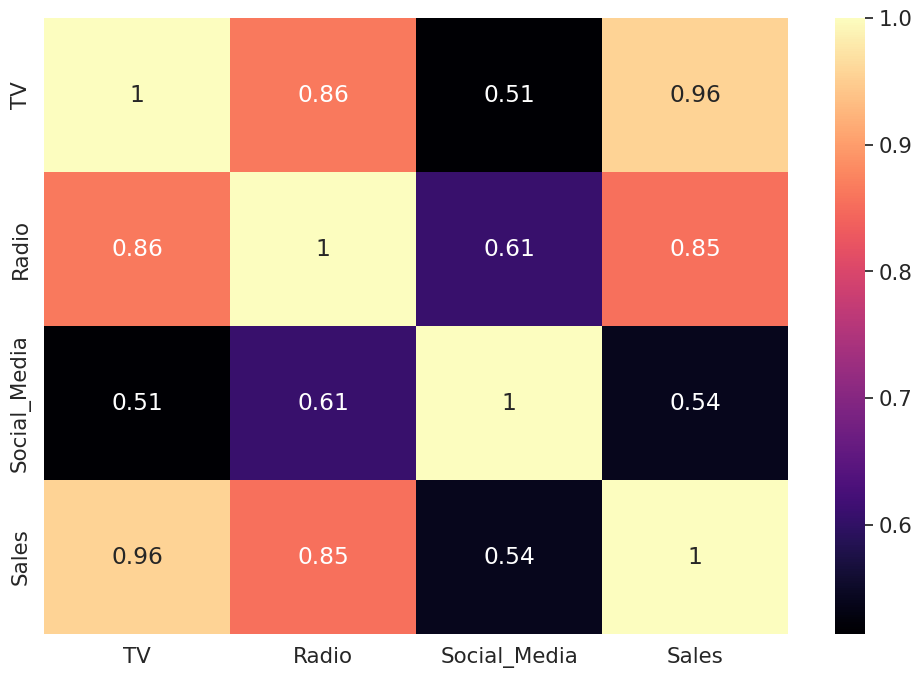

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(),cmap='magma',annot=True)

From the above plot we can say that initially there is a higher positive correlation between TV and Sales (0.96) than between Radio and Sales (0.85) or Social_Media and Sales (0.54)

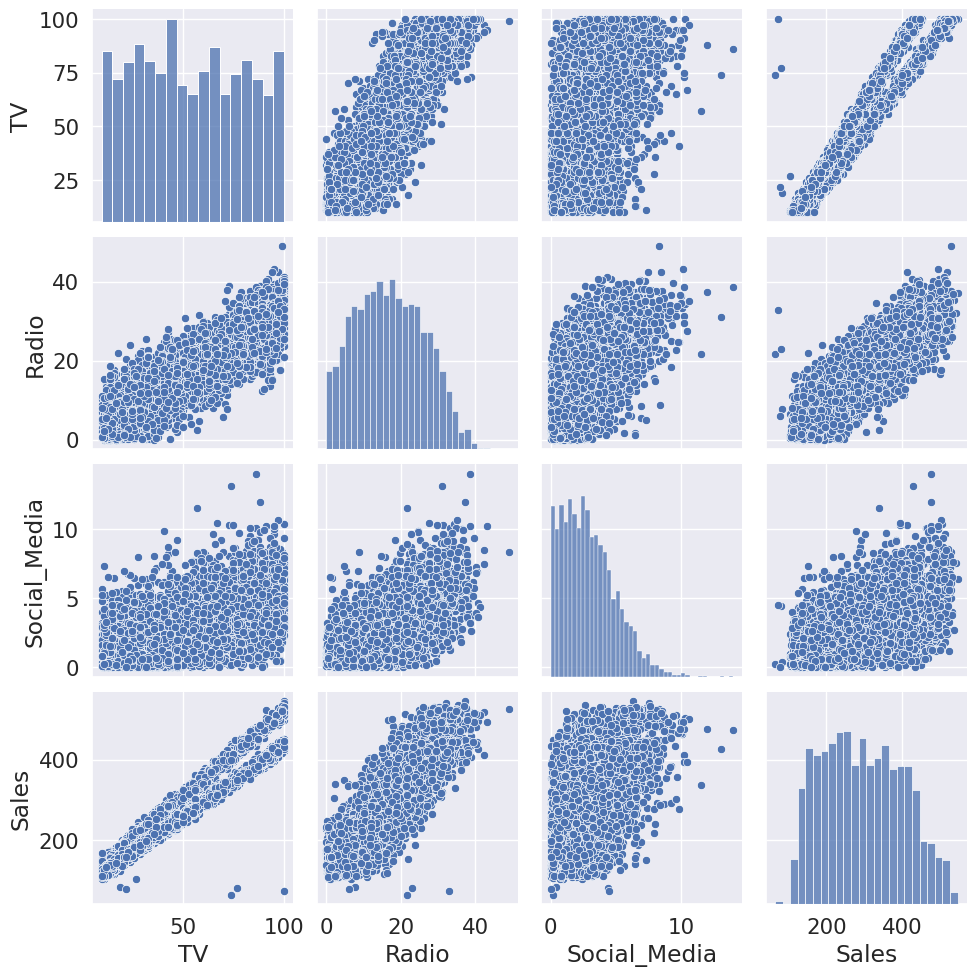

In [ ]:
sns.pairplot(df1)

The above plot shows there is a flat correlation between Social Media and Sales, whereas correlation between Radio and Sales is a bit better. And correlation between TV and sales is the best but there are some outliers we can notice.

# Modeling via Linear Regression
After storing the data from above in the variable <b>df1,</b> , we do the following:

In [ ]:
# Selecting the X and y variables
X = df1.drop(columns=['Sales','Influencer'])
y = df1['Sales']

In [ ]:
# Using Cross Validation through Time Series Split and Running Linear Regression
lr = LinearRegression()


In [ ]:
lr.fit(X, y) # refit the model with the complete dataset
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [3.4554708  0.98318562 2.46908408]
Intercept: 85.14627683442203


In [ ]:
print(cross_val_score(lr, X, y, cv=TimeSeriesSplit()))

[0.9929074  0.87467392 0.68882542 0.84679961 0.88031449]


Well, this looks reasonable already, although it could be better. But this model lets us break up the sales as we wanted to.

- <b>Note</b>:
We do not use the standard <b>k-fold cross-validation</b> here because we are dealing with time series data. TimeSeriesSplit is a more reasonable thing to do.

<b>For Normal Cross Validation</b>:
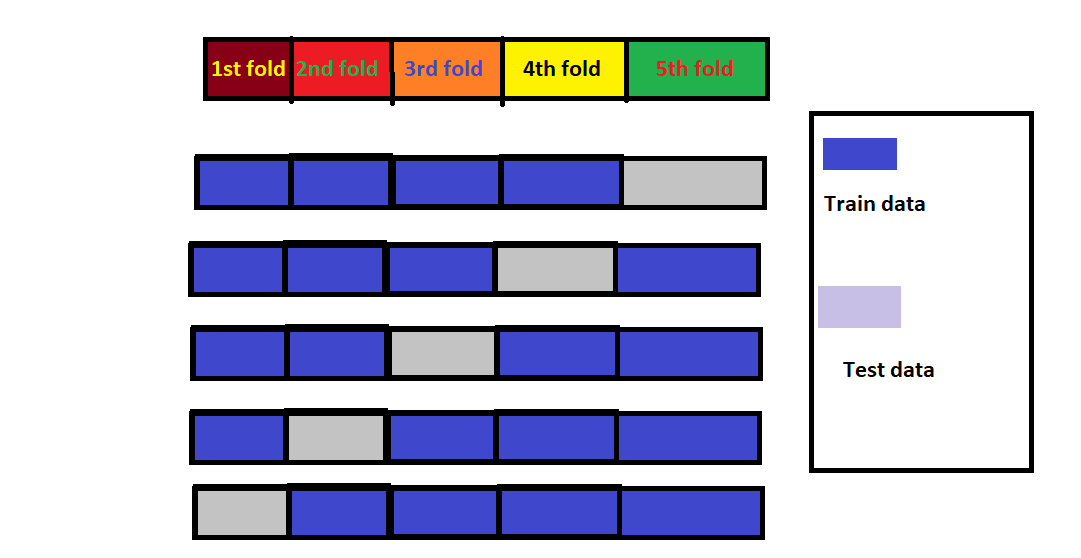

The general procedure is as follows:

- 1. Shuffle the dataset randomly.
- 2. Split the dataset into k groups
- 3. For each unique group:
> - Take the group as a hold out or test data set
> - Take the remaining groups as a training data set
> - Fit a model on the training set and evaluate it on the test set
> - Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

<b>For TimeSeries Cross Validation</b>:
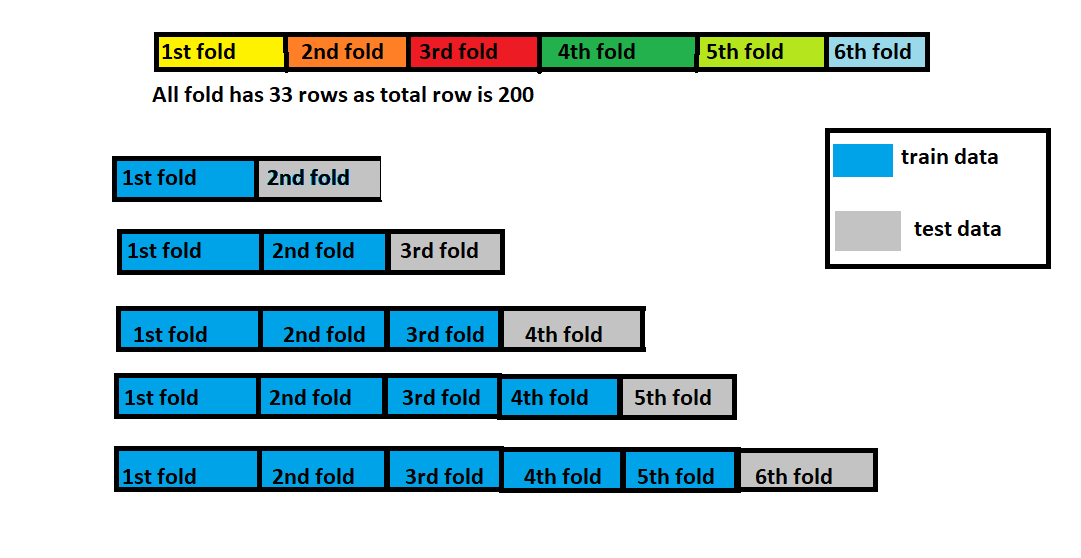

We can read more about TimeSeries Cross validation [here](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split).

Getting the coefficients and the intercept with Time Series Split:

Checking The Accuracy of the model through time series split:

In [ ]:
cv_results = cross_val_score(lr, X, y, cv=TimeSeriesSplit())
np.mean(cv_results)

0.8567041680084981

Getting the Coefficient and Intercept through OLS:

In [ ]:
import statsmodels.formula.api as sm
model = sm.ols(formula="Sales ~ TV + Radio + Social_Media", data = df1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.685e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:08:53   Log-Likelihood:                -21977.
No. Observations:                4552   AIC:                         4.396e+04
Df Residuals:                    4548   BIC:                         4.399e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       85.1463      1.052     80.904   

.summary() provides us with an abundance of insights on our model. Two main things that are most useful for us in this:
1. The Adj. R-squared is 0.917, which means that almost 92% of all variations in our data can be explained by our model, which is pretty good.
1. The p-values for TV, radio and Social_Media are 0.000, which indicates that they have a significant impact on sales.

From the values above we are getting this formula:
### <b>Sales = 85.1463 + 3.4555 * TV + 0.98 * Radio + 2.469 * Social Media</b>

# Checking Interaction effect between each Variables

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.regression import linear_model

# Selecting X
X3 = X.copy()
y3 = y.copy()
y3 = list(y3)

# generating interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X3)

#creating a new dataframe with the interaction terms included
interaction_df = pd.DataFrame(x_interaction, columns = ['TV','Radio','Social_Media',
                                                       'TV:Radio','TV:Social_Media','Radio:Social_Media'])

# Creating a linear model and fitting the DataFrame
interaction_model = linear_model.OLS(y3, interaction_df).fit()

# Checking p-values
interaction_model.pvalues[interaction_model.pvalues < 0.05]

TV                    0.000000e+00
Radio                 4.894864e-36
Social_Media          5.894242e-39
TV:Radio              4.270327e-99
TV:Social_Media       5.265578e-28
Radio:Social_Media    1.603664e-11
dtype: float64

As we can see there is a presence of interaction terms. Also, interaction with TV and Radio, TV and Social_Media, Radio and Social_Media proves to be very important for the prediction of Sales as we are getting p-values close to 0 for each interaction.

# Breaking Down the Sales
To illustrate the computation of the contributions, let us consider a single week:

In [ ]:
Original_week = df1.iloc[[196]]
Original_week

,TV,Radio,Social_Media,Influencer,Sales
Date,,,,,
2001-07-16,84,27.817582,6.171058,Micro,450.741646


In [ ]:
print(lr.predict(([[84.0, 27.817582, 6.171058]])))

[417.99253206]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


This is not exactly the true answer of 450.741646 from the table above, but let us stick with it for now. We can now see that the (unadjusted) contribution of TV is
## coef_TV * spendings_TV = 3.455 * 84 = 290.22
## coef_radio * spendings_radio = 0.98 * 27.817582 =  27.26123036
## coef_Social_Media * spendings_Social_Media = 2.4691 * 6.171058 = 15.2369593078
and for the other channels accordingly. Now, the contributions sum up to the model prediction 417.99253206, which is not the true target of 450.741646, so let us just multiply the contributions and baseline by a correction factor of:\
<b>correction_factor = 450.741646 / 417.99253206 ≈ 1.078</b> and everything is fine. We get
## contribution_TV = correction_factor * 290.22 = 312.857

We also get
- contribution_radio = correction_factor * 27.26123036 = 29.3876 and
- contribution_social_media = correction_factor * 15.236959 = 16.425
- base = 91.7877114

Adding everything up yields the observed label, as we want it:
## 312.857 + 29.3876 + 16.425 + 91.7877114 = 450.457.

# Contribution plot for all observations

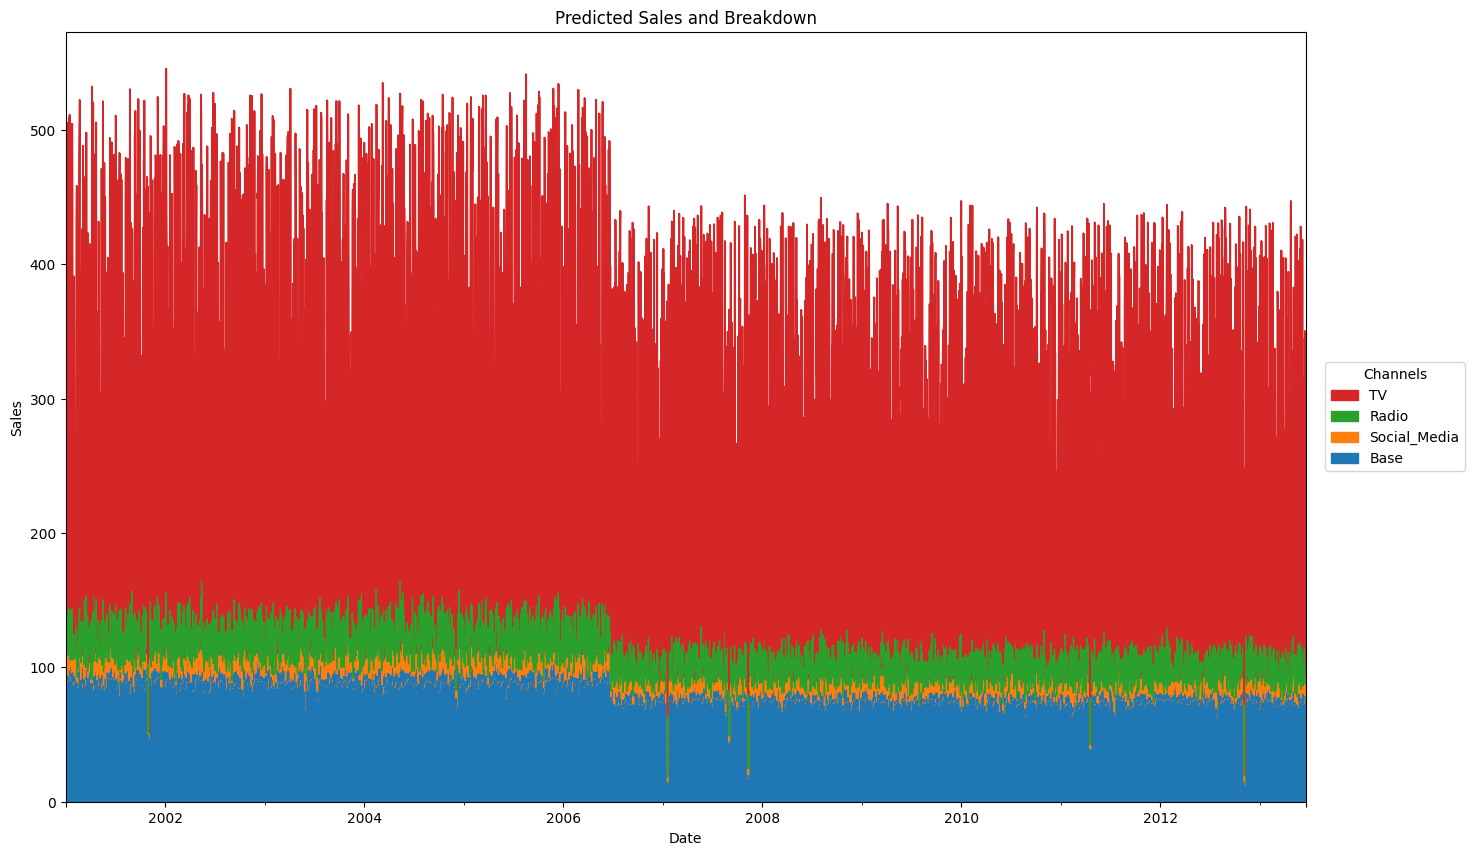

In [ ]:
weights = pd.Series(lr.coef_,index=X.columns)
base = lr.intercept_
unadj_contributions = X.mul(weights).assign(Base=base)
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    ) # contains all contributions for each day
ax = ax = (adj_contributions[['Base', 'Social_Media', 'Radio', 'TV']].plot.area(figsize=(16, 10),
                                                                                linewidth=1,title='Predicted Sales and Breakdown',
                                                                                ylabel='Sales',xlabel='Date'))
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

We can see (or compute) that the baseline is around 80 sales each day, Social Media contributes around 80-100 on average whenever it is active,Radio contributes around 100-150 on average whenever it is active ,  and TV contributes around 150- 450 when it is active.

<b>Note</b>: - One interesting thing we can notice from the chart, that base is supposed to be constant, but it is fluctuating. Because for each observation the correction factor for the intercept is changing, thats why we are seeing this fluctuation.

# Computing the Return on Investment (ROI)
We can now determine which channel was the best in terms of ROI, a number that measures the efficiency. The formula is simple:
## channel_ROI = Sales from the channel / channel spendings

- Calculating the TV ROI

In [ ]:
sales_from_tv = adj_contributions['TV'].sum()
spendings_on_tv = df1['TV'].sum()
tv_roi = sales_from_tv / spendings_on_tv
tv_roi

3.456317384842416

An ROI less than 1 means that the channel performed poorly. For the TV ROI we can say:
> ## For each 1 $ we spent on TV, we got 3 dollars 46 cents back.

- Calculating the Radio ROI

In [ ]:
sales_from_radio = adj_contributions['Radio'].sum()
spendings_on_radio = df1['Radio'].sum()
radio_roi = sales_from_radio / spendings_on_radio
radio_roi

0.9822807902564936

- Calculating the Social Media ROI

In [ ]:
sales_from_Social_Media = adj_contributions['Social_Media'].sum()
spendings_on_Social_Media = df1['Social_Media'].sum()
Social_Media_roi = sales_from_Social_Media / spendings_on_Social_Media
Social_Media_roi

2.465709000491316

From the above results we can see, TV and Social Media has an ROI of 3.46 and 2.47 which is much better, it seems that these channels worked quite well in the time period that we considered.

# Problems With This Simple Approach
While the above approach seems reasonable, it has certain shortcomings that we have to address:
1. The performance could be better. Sometimes, there is nothing we can do about bad performance because it depends on the data a lot, but we should try our best anyway.
2. Even more severe: The model itself definitely does not reflect reality. According to the linear formula, we can drive sales as high as we want by spending more and more money on advertising. Since the TV and Social Media have a high coefficient of 3.46 and 2.47, for each 1 $ we spend in these channels we generate additional sales of 3.46 dollars on TV and 2.47 dollars on Social Media. Repeat for infinite money, customers will hate this trick!
3. Optimizing becomes trivial and unrealistic as well. To maximize sales, we would now put all the money into the Tv and Social Media channels because they have the highest coefficients among the three. We would abandon radio advertising altogether which may be not the right thing to do if the company wants to retain its awareness among people.

# Creating Dummy Variables for Influencer
Since there are 4 distinct classes that are present within this variable, we will one-hot encode and split this into 4 different binary variables to indicate the kind of influencer used for the corresponding sales.
- <b>Note</b>: we actually only need (n-1) dummy variables for a categorical variable with n classes by logic that the classes are mutually exclusive and collectively exhaustive. For eg., if a Sale did not use Macro, Micro or Nano influencer, it is understood by default that it used a Mega influencer, thereby negating the need for a fourth binary indicator variable for Mega.

In [ ]:
# Dummy variable for Influencer
infl = pd.get_dummies(df1.Influencer)
# Binding it back to the orignal dataset and dropping categorical variable Influencer
model_data = pd.concat([df1,infl], axis=1)
model_data.drop('Influencer',inplace=True,axis=1)
model_data.head()

,TV,Radio,Social_Media,Sales,Macro,Mega,Micro,Nano
Date,,,,,,,,
2001-01-01,54,14.119060,4.215642,324.905658,0,0,0,1
2001-01-02,65,26.217056,5.481302,370.511432,1,0,0,0
2001-01-03,67,16.705375,2.657608,389.325067,1,0,0,0
2001-01-04,73,31.327127,10.260554,412.936802,0,0,0,1
2001-01-05,28,17.343639,2.071636,214.546227,0,0,1,0


In [ ]:
X1 = model_data.loc[:, model_data.columns != 'Sales']
X1 = X1.loc[:, X1.columns != 'Mega']
y1 = model_data['Sales']

here we are taking base influencer as Mega, otherwise we would get negative coefficients in Macro, Micro and Nano. So we have removed Mega from X variables to take it as a base influencer.

# Splitting the data into Train and Test

We are splitting the dataset into arrays of dependent (Y) and independent (X) variables to be fed into the model. Since Regression (Estimation) is a supervised learning method, we have the concept of Train and Test sets here. We will use 65% of the dataset to train the Machine Learning model. Once the model has been trained, we use the remaining 35% of the dataset that is alien to it, and gauge whether it is able to correctly predict the Sales, given the marketing spends for data it hasn’t seen before.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1 ,test_size=0.35, random_state=101)
# Random state set to 101 to get same results in every iteration

# Training the model

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

# Results and Evaluation

In [ ]:
# print the intercept
print(lr2.intercept_)

83.39391259986061


In [ ]:
coeff_df = pd.DataFrame(lr2.coef_,X1.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,3.454105
Radio,0.975709
Social_Media,2.612431
Macro,2.629586
Micro,0.738496
Nano,1.543664


# Interpreting the Coefficients
If we take a closer look above we understand that the spends on TV have a positive causal relationship with sales, as an increase of 1 Mn dollars in TV spends has an effect of 3.45 Mn increase in Sales. It is however interesting to note that Radio and Social media also have a positive impact on Sales as they increase the sales by 0.97 Mn and 2.61 Mn dollars with every additional 1 Mn dollars spent.
Now since Macro, Micro and Nano are binary variables, what their coefficients mean is that whenever the variable is flagged 1, i.e. suppose a Macro influencer was used, sales increased by around $2.63 Mn.

Text(0, 0.5, 'Predicted Sales')

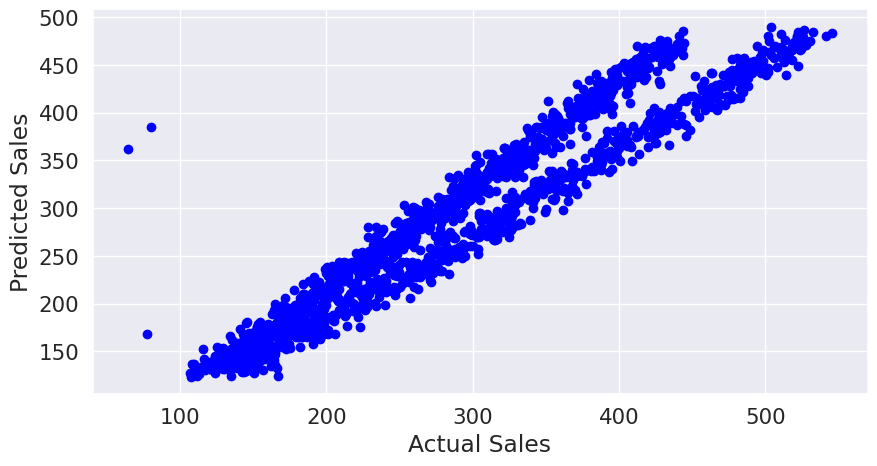

In [ ]:
plt.figure(figsize=(10,5))

# Predicting Sales for the test set
y_pred = lr2.predict(X_test)
# Plotting predicted values vs actual values available for the test set
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

The above chart shows us that the predicted values are less than the actual values, means it is a little bit underfitting

# Evaluating the Model

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Square',metrics.r2_score(y_test,y_pred))

MAE: 25.915060314272694
MSE: 972.1516530307853
RMSE: 31.17934657799591
R-Square 0.9126916704947571


## Some popular metrics used to evaluate linear regression models are calculated above. Highlighting on the most pertinent ones —
1. RSquare of 0.91 implies that the independent variables i.e. the marketing spends across the channels are able to successfully explain 91% of the variability seen in Sales across the dataset.
2. Mean absolute error (MAE) is calculated as the mean of the absolute difference in the predicted sales of the test dataset and the actual values of Sales given. Here, there is a fluctuation of about 25.915 Mn dollars between the predicted and actual values of Sales.
3. Root Mean Square error (RMSE) is another transformed variation of measuring the fluctuations between actual and predicted sales. It is found to be $31.17 Mn, which is also close to the MAE reported.


In conclusion, the linear model has performed average.

# Feature importance with Random Forest
<b>Note</b>: - Random forest is normally used for both classification & regression purpose, but here we are not fitting the data into Random forest for classification. We are using RandomForestRegressor to get the feature importance, that describes which features are relevant. It can help with better understanding of the solved problem and sometimes lead to model improvements by employing the feature selection. We can read more from [here](https://mljar.com/blog/feature-importance-in-random-forest/).

<Axes: >

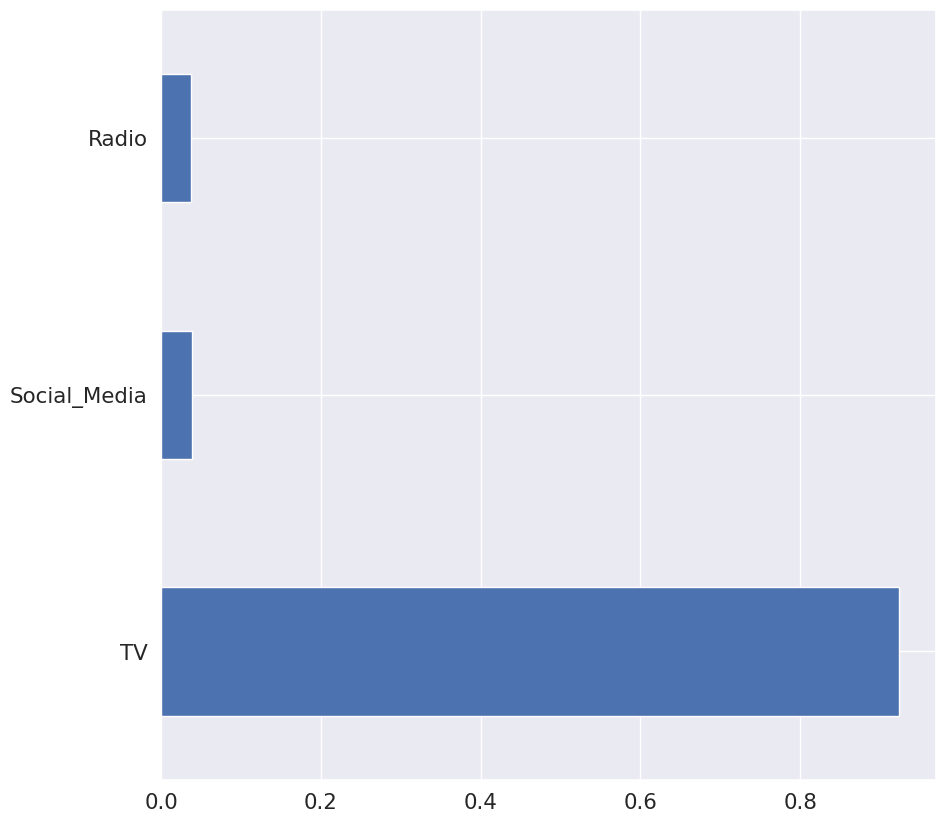

In [ ]:
# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

# Cross Validation through Train Test Split
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=.25, random_state=0)

model2 = RandomForestRegressor(random_state=1)
model2.fit(X_train2, y_train2)
pred = model2.predict(X_test2)

# Visualizing Feature Importance
feat_importances = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
feat_importances

TV              0.923749
Radio           0.038017
Social_Media    0.038233
dtype: float64

There seems to be a pattern, where TV is the most important, followed by Social_Media, leaving radio last.

# Identifying the best model
Next, we’ll test a load of different regression models to see which one delivers the best results. The quickest and easiest way to do this is to place all the model parameters in a Python dictionary and then loop over them.

- ## Importing Packages

In [ ]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression

- ## Scaling the data
To help improve the model results, it’s worth using a scaling or normalisation technique on the data, especially if it’s skewed. Ours is not too bad, but we’ve passed it through StandardScaler() to be sure.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- ## Training the models

Next we will place 19 differnet algorithms in a dictionary, later we will fit this regressors with our x_train and y_train.

In [ ]:
regressors = {
    "XGBRegressor": XGBRegressor(booster='gblinear', objective ='reg:squarederror', verbosity = 0, random_state=42),
    # reg:linear is now deprecated in favor of reg:squarederror
    # booster='gblinear' because by default it is set to 'gbtree'. 'gbtree' won't give us coefficients
    # verbosity = 0 -> Verbosity of printing messages. Valid values are 0 (silent/ignore errors), 1 (warning), 2 (info), 3 (debug).
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
    "pls": PLSRegression(),
}

We’ll create a Pandas dataframe called df_models and now loop through the regressors, fit each one to the data, and return the Root Mean Squared Error of a 10-fold cross validation to the dataframe, and then display the output.

In [ ]:
import warnings
warnings.filterwarnings("ignore")  # doesn't spam the notebook with warnings

df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv'])
for key in regressors:
    #print('*',key)
    start_time = time.time()
    regressor = regressors[key]
    model3 = regressor.fit(X_train, y_train)
    y_pred = model3.predict(X_test)

    scores = cross_val_score(model3, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

    row = {'model': key,'run_time': format(round((time.time() - start_time)/60,7)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),'rmse_cv': round(np.mean(np.sqrt(-scores)))}

    df_models = df_models.append(row, ignore_index=True)

# Printing each and every regressors with run time, rmse and rmse_cv
rmse = root mean square error\
rmse_cv = root mean square error cross validation

In [ ]:
df_models.head(20).sort_values(by='rmse_cv', ascending=True)

,model,run_time,rmse,rmse_cv
0,XGBRegressor,0.0225712,31,30
15,BayesianRidge,0.0009985,31,30
14,ARDRegression,0.0016658,31,30
12,HuberRegressor,0.002392,31,30
10,Lars,0.0014101,31,30
8,LinearRegression,0.0018161,31,30
9,Ridge,0.0013734,31,30
17,OrthogonalMatchingPursuit,0.000307,32,31
1,RandomForestRegressor,0.1126837,32,31
13,PassiveAggressiveRegressor,0.0006419,35,33


The first outcome i.e. Ridge Regressor is the best model for out dataset
Now predicting y value with help of x_test.

> ### <b>Note</b>: -

<b>RidgeRegression</b>: It is a <b>Regularization Method</b> to reduce <b>Overfitting.</b>

We try to use a trend line that overfit the training data, and so, it has much higher variance then the OLS. The main idea of Ridge Regression is to fit a new line that doesn’t fit the training data. In other words, we introduce a certain <b>Amount of Bias</b> into the new trend line.

![image](https://www.andreaperlato.com/img/ridge.png)

What we do in practice, is to introduce a Bias that we call <b>Lambda</b>, and the <b>Penalty Function</b> is: lambda*slope^2.\
The Lambda is a penalty terms and this value is called <b>Ridge Regression</b> or <b>L2</b>.

The L2 penalty is quadratic: <i>lambdaslope^2: none of the coefficients (slope) are extremely large</i>.\
The L1 penalty is the absolute value: lambda|slope|: choose the most important features.

When <b>Lambda = 0</b>, the penalty is also 0, and so we are just minimizing the sum of the squared residuals.
When <b>Lambda asymptotically increase</b>, we arrive to a slope close to 0: so, the larger LAMBDA is, our prediction became less sensitive to the independent variable. We can use Cross-Validation, typically 10-Fold Cross Validation is used in order to determine which LAMBDA give back the lowest VARIANCE.\
<b>Lambda is the Tuning Parameter that controls the bias-variance tradeoff</b> and we estimate its best value via cross-validation.

# Choosing best alpha for Ridge regression

In [ ]:
from sklearn.linear_model import RidgeCV

# Choosing best alpha for ridge regression with Leave one out cross-validation
ridge_cv = RidgeCV(alphas=(0.01, 0.1, 1, 10, 100), scoring='neg_mean_squared_error', store_cv_values=True).fit(X_train, y_train)

# Best alpha
ridge_cv.alpha_

0.1

# Train the model with best alpha value

In [ ]:
regressor = Ridge(alpha=0.1)
model4 = regressor.fit(X_train, y_train)
y_pred = model4.predict(X_test)
y_pred

array([131.73658429, 339.02167081, 247.57944893, ..., 255.39365167,
       263.03041359, 473.15086952])

# Defining Actual and Predicted values

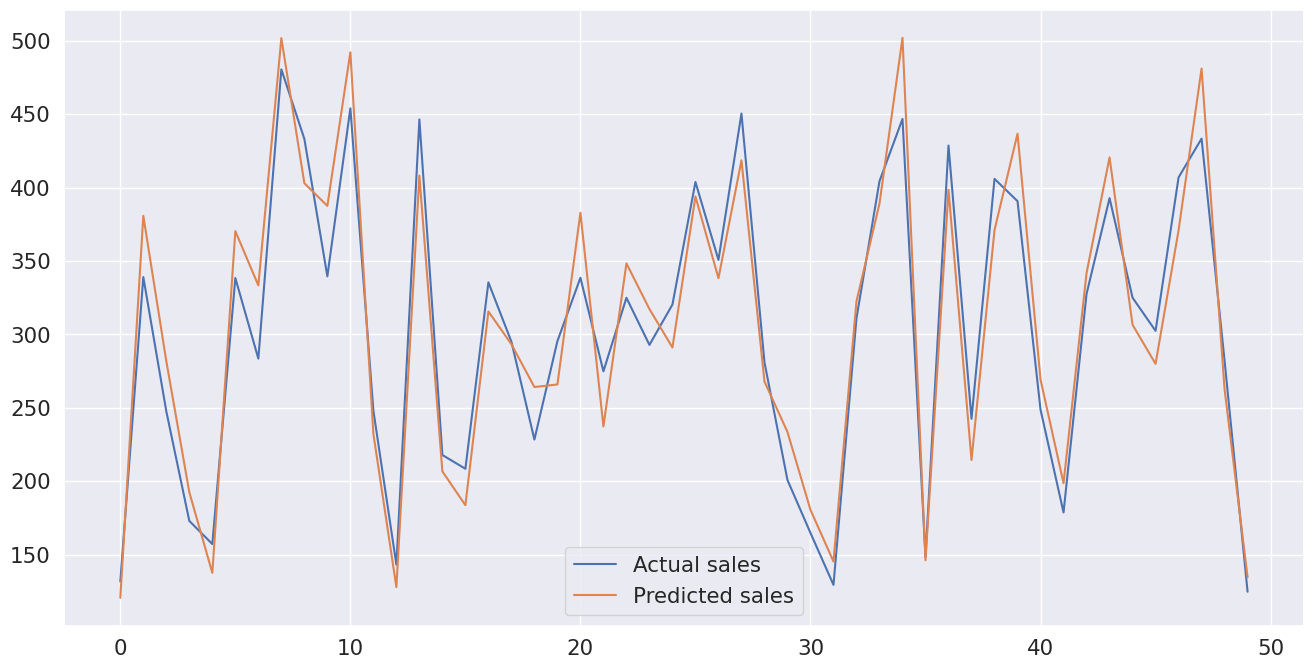

In [ ]:
test2 = pd.DataFrame({'Predicted sales':y_pred, 'Actual sales':y_test})
fig= plt.figure(figsize=(16,8))
test2 = test2.reset_index()
test2 = test2.drop(['Date'],axis=1)
plt.plot(test2[:50])
plt.legend(['Actual sales','Predicted sales'])

This model works, but it’s only crude given the complexity of many MMMs. To further improve this, there are a whole load of other things we could do. Firstly, we could add some lagged data, by using shift to get the channel spend in the previous days to see if that’s correlated to sales in future periods. We could also do some hyperparameter tuning, or add in some additional regressors if we have them.

# Fixing the Problems
To circumvent these problems, we can do some clever feature engineering that allows us to incorporate some marketing domain knowledge into the model. The following techniques will improve performance as well as making the model more realistic.

# Advertising Adstock
This feature engineering that we will do is a crucial component called the advertising adstock, a term coined by Simon Broadbent [1]. It is a fancy word that encapsulates two simple concepts:
1. We assume that the more money you spend on advertising, the higher your sales get. However, the increase gets weaker the more we spend. For example, increasing the TV spends from 0 € to 100,000 € increases our sales a lot, but increasing it from 100,000,000 € to 100,100,000 € does not do that much anymore. This is called <b>a saturation effect</b> or <b>the effect of diminishing returns</b>.
2. If we spend money on advertising week T, often people will not immediately buy your product, but a few (let us say x) weeks later. This is because the product might be expensive, and people want to think about it carefully or compare it to similar products from other companies. Whatever the reason might be, the sale in week T + x is partially caused by the advertising you played in week T, so it should also get some credits. This is called the <b>carry-over</b> or <b>lagged effect</b>.

Our new model is still linear, but with adstock features instead of raw spendings as input. This makes the model much stronger while keeping it interpretable.

# Building Saturation and Carry-Over Effects in scikit-learn
Unfortunately for us, scikit-learn does not contain these transformations because they are not of cross-industry interest. But since both transformations are not that complicated it is a nice opportunity to practice writing scikit-learn compatible estimators.

# Creating a Saturation Effect
We want to create a transformation (=mathematical function) with the following properties:
1. If the spendings are 0, the saturated spendings are also 0.
2. The transformation is monotonically increasing, i.e. the higher the input spendings, the higher the saturated output spendings.
3. The saturated values do not grow to infinity. Instead, they are upper bounded by some number, let us say 1.
In short, we want something like this:\
![image](https://miro.medium.com/max/700/1*5I09TDswHmIJ76DlbaozAg.png)

There are many ways to get functions like this, in the picture we see the function 1-exp(-0.7x), for example. So let us just use this function template and generalize it to 1-exp(-ax) for some a > 0. a is a hyperparameter that we can tune afterward because usually, we do not know the shape of the saturation function.
> <b>Note</b>: There are many more standard saturations functions, such as the Adbudg and Hill functions, but let us stick with the exponential function for simplicity.

<b>A nice side-effect</b>: We are able to output the saturation curves in the end, so we know if it makes sense to spend more money or if the channel is saturated already. From the picture above, for example, it seems like investing more than 8 is useless.

In [ ]:
class ExponentialSaturation:
    def __init__(self, a=1.):
        self.a = a

    def transform(self, X):
        return 1 - np.exp(-self.a*X)

However, we will add some sanity checks for the inputs to make it scikit-learn compliant. This bloats up the code a bit, but it is a comparatively small price that we have to pay.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array
class ExponentialSaturation(BaseEstimator, TransformerMixin):
    def __init__(self, a=1.):
        self.a = a

    def fit(self, X, y=None):
        X = check_array(X)
        self._check_n_features(X, reset=True) # from BaseEstimator
        return self
    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False) # from BaseEstimator
        return 1 - np.exp(-self.a*X)

It is still not perfect because we should also implement a check for a being larger than zero, but this is something we can easily do on our own. With the ExponentialSaturation transformer, we can do the following:

![image](https://miro.medium.com/max/452/1*hgHVvbOuRoQyMxW2mUNZww.png)

Let us now move on to the next effect.

# Creating a Carry-Over Effect
This one is slightly more tricky. Let us use an example to understand what we want to achieve. We are given a series of spendings over time such as
### (16, 0, 0, 0, 0, 4, 8, 0, 0, 0),
meaning that we spent 16 in the first week, then we spent nothing from week 2 to 5, then we spent 4 in week 6, etc.

We now want that spendings in one week to get partially carried over to the next weeks in an exponential fashion. This means: In week 1 there is a spend of 16. Then we carry over 50%, meaning
- 0.5 * 16 = 8 to week 2,
- 0.5² * 16 = 4 to week 3,
- 0.5³ * 16 = 2 to week 4,
- …

## This introduces two hyperparameters:
<b>The strength (how much gets carried over?)</b> and <b>the length</b> (how long does it get carried over?) of the carry-over effect. If we use a strength of 50% and a length of 2, the spending sequence from above becomes
### (16, 8, 4, 0, 0, 4, 10, 5, 2, 0).

We can write some loops to implement this behavior, a nice and fast way is using convolutions though. We will not explain it in detail.

In [ ]:
from scipy.signal import convolve2d
import numpy as np
class ExponentialCarryover(BaseEstimator, TransformerMixin):
    def __init__(self, strength=0.5, length=1):
        self.strength = strength
        self.length = length
    def fit(self, X, y=None):
        X = check_array(X)
        self._check_n_features(X, reset=True)
        self.sliding_window_ = (
            self.strength ** np.arange(self.length + 1)
        ).reshape(-1, 1)
        return self
    def transform(self, X: np.ndarray):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False)
        convolution = convolve2d(X, self.sliding_window_)
        if self.length > 0:
            convolution = convolution[: -self.length]
        return convolution

We can see that the class takes the strength and length. During the fit it creates a sliding window that gets used by the convolve2d function, doing magically just what we want. If we know convolutional layers from CNNs, this is exactly what happens here. Graphically, it does the following:

![image](https://miro.medium.com/max/656/1*8AEZKG-bjymGEHHa-k-YuQ.gif)

> <b>Note</b>: There are many more ways to create a carryover as well. The decay does not have to be exponential. And maybe the peak of the advertising effect is not reached on the day the money was spent, but always the next week. We can express all of these variations by changing the sliding window accordingly.
Let us combine both saturation and carry-over effects to create a more realistic marketing mix model.

# The Final Model
We will use different saturations and carryovers for each channel. This makes sense because usually, a TV ad sticks longer in our head than a banner that we see online, for example. From a high-level perspective, the model will look like this:
![image](https://miro.medium.com/max/700/1*ZitGnL3nODgKcdM7xKPqug.png)

Note that the blue pipeline is just a function of the TV spendings, the orange one of radio spendings, and the purple one of banner spendings. We can efficiently implement this in scikit-learn using the <b>ColumnTransformer</b> and <b>Pipeline</b> classes. The <b>ColumnTransformer</b> allows us to use a different transformation for each ad channel while the <b>Pipeline</b> allows us to chain operations for a single channel. Take a second to understand the following snippet:

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Applying adstock effects to each channel via Pipeline with ColumnTransformer
adstock =ColumnTransformer(
    [
     ('tv_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['TV']),
     ('radio_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Radio']),
     ('Social_Media_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Social_Media']),
     ('Macro_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Macro']),
     ('Micro_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Micro']),
     ('Nano_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Nano']),
    ],
    remainder='passthrough'
)

# Creating a new model with adstock effects
model5 = Pipeline([
                  ('adstock', adstock),
                  ('regression', Ridge(alpha=0.1))
])

In [ ]:
# Setting up X and y variables
X2 = X1.copy()
y2 = y1.copy()

# Fitting X and y variables into the new model
model5.fit(X2, y2)

Pipeline(steps=[('adstock',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tv_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['TV']),
                                                 ('radio_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['Radio']),
                                                 ('Social_Media_pipe',
                                                  Pipeline(steps...
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['Macro']),
                                                 ('Micro_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['Micro']),
                                                 ('Nano_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['Nano'])])),
                ('regression', Ridge(alpha=0.1))])

In [ ]:
print(cross_val_score(model5, X2, y2, cv=TimeSeriesSplit()).mean())

0.017147981656106516


It works!
# Hyperparameter Tuning
We will use Optuna, an advanced library for optimization tasks. Among many other things, it offers a scikit-learn-compatible OptunaSearchCV class that we can see as a drop-in replacement of scikit-learn’s GridSearchCV and RandomizedSearchCV .
In a nutshell, OptunaSearchCV is a much smarter version of RandomizedSearchCV . While RandomizedSearchCV walks around randomly only, OptunaSearchCV walks around randomly at first, but then checks hyperparameter combinations that look most promising.

In [ ]:
# Installing the required module via pip
!pip install optuna==2.10.1

In [ ]:
from optuna.integration import OptunaSearchCV
from optuna.distributions import UniformDistribution, IntUniformDistribution

# Implementing AdStock parameters on the previously fitted model using OptunaSearchCV
tuned_model = OptunaSearchCV(
    estimator = model5,
    param_distributions={
        'adstock__tv_pipe__carryover__strength': UniformDistribution(0, 1),
        'adstock__tv_pipe__carryover__length': IntUniformDistribution(0, 6),
        'adstock__tv_pipe__saturation__a': UniformDistribution(0, 0.01),
        'adstock__radio_pipe__carryover__strength': UniformDistribution(0, 1),
        'adstock__radio_pipe__carryover__length': IntUniformDistribution(0, 6),
        'adstock__radio_pipe__saturation__a': UniformDistribution(0, 0.01),
        'adstock__Social_Media_pipe__carryover__strength': UniformDistribution(0, 1),
        'adstock__Social_Media_pipe__carryover__length': IntUniformDistribution(0, 6),
        'adstock__Social_Media_pipe__saturation__a': UniformDistribution(0, 0.01),
        'adstock__Macro_pipe__carryover__strength': UniformDistribution(0, 1),
        'adstock__Macro_pipe__carryover__length': IntUniformDistribution(0, 6),
        'adstock__Macro_pipe__saturation__a': UniformDistribution(0, 0.01),
        'adstock__Micro_pipe__carryover__strength': UniformDistribution(0, 1),
        'adstock__Micro_pipe__carryover__length': IntUniformDistribution(0, 6),
        'adstock__Micro_pipe__saturation__a': UniformDistribution(0, 0.01),
        'adstock__Nano_pipe__carryover__strength': UniformDistribution(0, 1),
        'adstock__Nano_pipe__carryover__length': IntUniformDistribution(0, 6),
        'adstock__Nano_pipe__saturation__a': UniformDistribution(0, 0.01),
    },
    n_trials=100,
    cv=TimeSeriesSplit(),
    random_state=0
)

# estimator – Object to use to fit the data.
# param_distributions – Dictionary where keys are parameters and values are distributions.
# Distributions are assumed to implement the optuna distribution interface.
# n_trials = Number of iterators
# cv – Cross-validation strategy.

# For more details: https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html
# see the example part of the above link it shows how using optuna search cv is helping to tune the support vector machine.

We tell Optuna to optimize model . It does so by using all parameters we specify in param_distributions . Because our model is quite nested, i.e. there are pipelines in a column transformer that itself is in a pipeline again, we have to specify exactly which hyperparameter we want to tune. This is done via strings such as adstock__tv_pipe__carryover__strength , where two underscores separate different levels of the complete model. We find the words adstock , tv_pipe , carryover all in the model specification, while strength is a parameter of the ExponentialCarryover transformer.\
Then, we find some distributions. UniformDistribution(0, 1) means that it should look for float parameters between 0 and 1. By the same logic, IntUniformDistribution(0, 6) searches for integer values between 0 and 6 (not 5!), thus we tell the model to only consider carryover length less or equal to six weeks, which is just a choice we make.\
We try n_trials=1000 different combinations of parameters and evaluate using a TimeSeriesSplit again. Keep the results reproducible by setting random_state=0 . Done! This should be enough to understand the code.
# Performance Check
Let us check the performance using this optimized model named tuned_model . It takes a long time. We can reduce the n_trials to 100 to get a worse solution much faster.

In [ ]:
# Checking optimal cross validation accuracy through TimeSeriesSplit Cross validation
print(cross_val_score(tuned_model, X2, y2, cv=TimeSeriesSplit()).mean())

[I 2023-07-14 09:05:02,534] A new study created in memory with name: no-name-39b53272-f5b2-4cc6-a841-2d907cb22849
[I 2023-07-14 09:05:02,742] Trial 0 finished with value: 0.7929426947518272 and parameters: {'adstock__tv_pipe__carryover__strength': 0.4860473230215504, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.009855760506615989, 'adstock__radio_pipe__carryover__strength': 0.1955964101622225, 'adstock__radio_pipe__carryover__length': 4, 'adstock__radio_pipe__saturation__a': 0.00980582177099305, 'adstock__Social_Media_pipe__carryover__strength': 0.18048029738995275, 'adstock__Social_Media_pipe__carryover__length': 4, 'adstock__Social_Media_pipe__saturation__a': 0.008463095456331128, 'adstock__Macro_pipe__carryover__strength': 0.7967092952533198, 'adstock__Macro_pipe__carryover__length': 6, 'adstock__Macro_pipe__saturation__a': 0.00517502161880338, 'adstock__Micro_pipe__carryover__strength': 0.04182737713424278, 'adstock__Micro_pipe__carryover__length':

0.8619274966034197


In [ ]:
# Fitting X and y variables on the new Tuned Model
tuned_model.fit(X2, y2)

[I 2023-07-14 09:07:02,452] A new study created in memory with name: no-name-7a8a288e-50f2-45db-b0f4-ac9828028a2e
[I 2023-07-14 09:07:02,632] Trial 0 finished with value: 0.7172022891158132 and parameters: {'adstock__tv_pipe__carryover__strength': 0.4860473230215504, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.009855760506615989, 'adstock__radio_pipe__carryover__strength': 0.1955964101622225, 'adstock__radio_pipe__carryover__length': 4, 'adstock__radio_pipe__saturation__a': 0.00980582177099305, 'adstock__Social_Media_pipe__carryover__strength': 0.18048029738995275, 'adstock__Social_Media_pipe__carryover__length': 4, 'adstock__Social_Media_pipe__saturation__a': 0.008463095456331128, 'adstock__Macro_pipe__carryover__strength': 0.7967092952533198, 'adstock__Macro_pipe__carryover__length': 6, 'adstock__Macro_pipe__saturation__a': 0.00517502161880338, 'adstock__Micro_pipe__carryover__strength': 0.04182737713424278, 'adstock__Micro_pipe__carryover__length':

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('tv_pipe',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['TV']),
                                                                          ('radio_pipe',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCar...
                                    'adstock__radio_pipe__carryover__strength': UniformDistribution(high=1.0, low=0.0),
                                    'adstock__radio_pipe__saturation__a': UniformDistribution(high=0.01, low=0.0),
                                    'adstock__tv_pipe__carryover__length': IntUniformDistribution(high=6, low=0, step=1),
                                    'adstock__tv_pipe__carryover__strength': UniformDistribution(high=1.0, low=0.0),
                                    'adstock__tv_pipe__saturation__a': UniformDistribution(high=0.01, low=0.0)},
               random_state=0)

- ## The optimal hyperparameters are the following:

In [ ]:
print(tuned_model.best_params_)
print(tuned_model.best_estimator_.named_steps['regression'].coef_)
print(tuned_model.best_estimator_.named_steps['regression'].intercept_)

{'adstock__tv_pipe__carryover__strength': 0.7308988985715845, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.001280728613970493, 'adstock__radio_pipe__carryover__strength': 0.3484830516188324, 'adstock__radio_pipe__carryover__length': 4, 'adstock__radio_pipe__saturation__a': 0.0068091280178334485, 'adstock__Social_Media_pipe__carryover__strength': 0.6097778701055326, 'adstock__Social_Media_pipe__carryover__length': 6, 'adstock__Social_Media_pipe__saturation__a': 0.009999966295278466, 'adstock__Macro_pipe__carryover__strength': 0.8197398213202243, 'adstock__Macro_pipe__carryover__length': 4, 'adstock__Macro_pipe__saturation__a': 0.005173274473890295, 'adstock__Micro_pipe__carryover__strength': 0.08129526075111157, 'adstock__Micro_pipe__carryover__length': 5, 'adstock__Micro_pipe__saturation__a': 0.006168919713088185, 'adstock__Nano_pipe__carryover__strength': 0.5476934665851415, 'adstock__Nano_pipe__carryover__length': 2, 'adstock__Nano_pipe__saturation__

- ## Printing best Parameter value for each X variable in a DataFrame

In [ ]:
# Getting adstock parameters of the Tuned Model for each channel through a DataFrame
value = pd.DataFrame.from_dict(tuned_model.best_params_ , orient='index', columns=["value"] )
value

,value
adstock__tv_pipe__carryover__strength,0.730899
adstock__tv_pipe__carryover__length,0.000000
adstock__tv_pipe__saturation__a,0.001281
adstock__radio_pipe__carryover__strength,0.348483
adstock__radio_pipe__carryover__length,4.000000
adstock__radio_pipe__saturation__a,0.006809
adstock__Social_Media_pipe__carryover__strength,0.609778
adstock__Social_Media_pipe__carryover__length,6.000000
adstock__Social_Media_pipe__saturation__a,0.010000
adstock__Macro_pipe__carryover__strength,0.819740


We can see from the above results, TV has the most carryover strength while Social Media & Radio have most carryover length. It means TV ads have high impact on Sales after initial spending, but they don't last long, quickly wear off in the same week. While Social Media and Radio have relatively less impact on Sales but they still have an effect on sales respectably 4 & 6 weeks later. Interestingly Macro influencers have both high carryover length and strength.

In [ ]:
# applying get_value() function for tv saturation
tv_sat_a = value._get_value('adstock__tv_pipe__saturation__a', 'value')

In [ ]:
# applying get_value() function for radio saturation
radio_sat_a = value._get_value('adstock__radio_pipe__saturation__a', 'value')

In [ ]:
# applying get_value() function for social media saturation
Social_Media_sat_a = value._get_value('adstock__Social_Media_pipe__saturation__a', 'value')

In [ ]:
# applying get_value() function for macro saturation
Macro_sat_a = value._get_value('adstock__Macro_pipe__saturation__a', 'value')

In [ ]:
# applying get_value() function for micro saturation
Micro_sat_a = value._get_value('adstock__Micro_pipe__saturation__a', 'value')

In [ ]:
# applying get_value() function for nano saturation
Nano_sat_a = value._get_value('adstock__Nano_pipe__saturation__a', 'value')
Nano_sat_a

0.001509412366168644

- ## Calculating Exponents of all X variables

In [ ]:
y_axis_TV = 1- np.exp(range(0,1100)*(-tv_sat_a))
y_axis_radio = 1- np.exp(range(0,1100)*(-radio_sat_a))
y_axis_Social_Media = 1- np.exp(range(0,1100)*(-Social_Media_sat_a))
y_axis_Macro = 1- np.exp(range(0,1100)*(-Macro_sat_a))
y_axis_Micro = 1- np.exp(range(0,1100)*(-Micro_sat_a))
y_axis_Nano = 1- np.exp(range(0,1100)*(-Nano_sat_a))

# Saturation Effects

- ## Without Selecting the Dummy variables

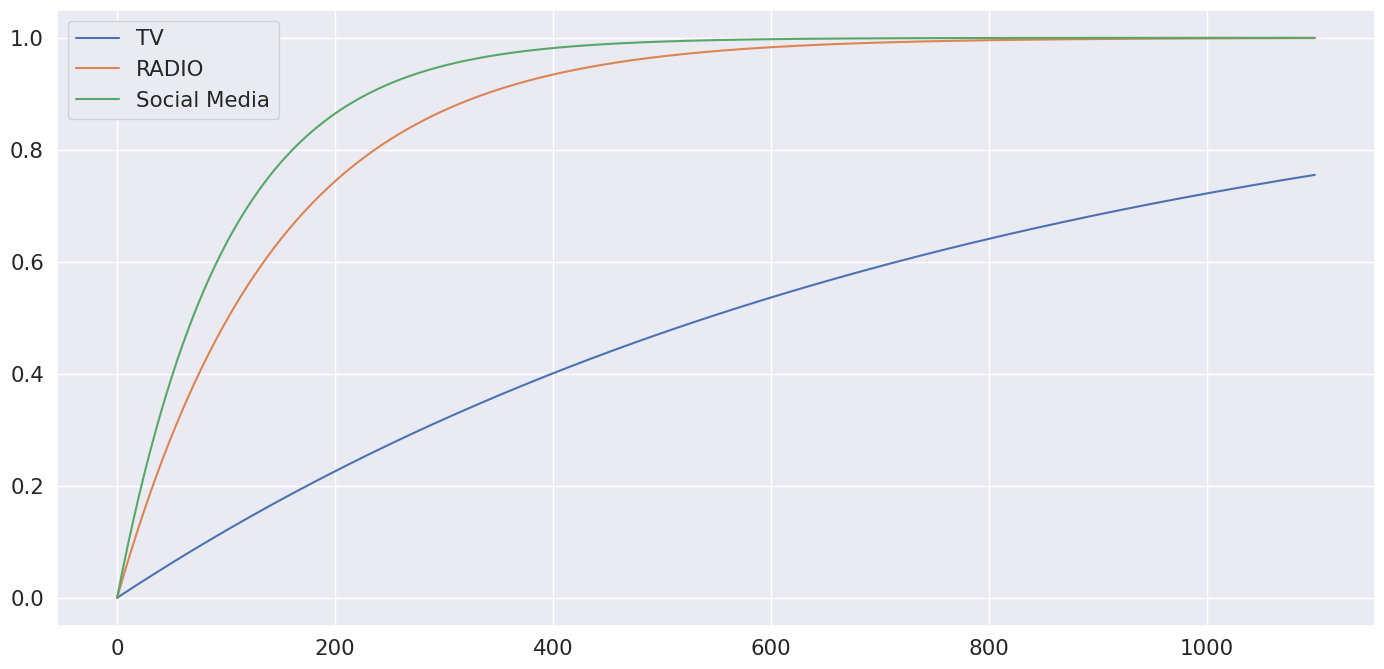

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(17,8))

plt.plot(range(0,1100),y_axis_TV, label='TV')
plt.plot(range(0,1100),y_axis_radio, label='RADIO')
plt.plot(range(0,1100),y_axis_Social_Media, label='Social Media')

plt.legend()
plt.show()

We are getting saturation graph of tv radio and social media in same plot it is making sense to compare their saturation graphically.\
From here it seems like spending more than 300 is useless for Radio and spending more than 230 is useless for Social Media


- ## With using the Dummy variables

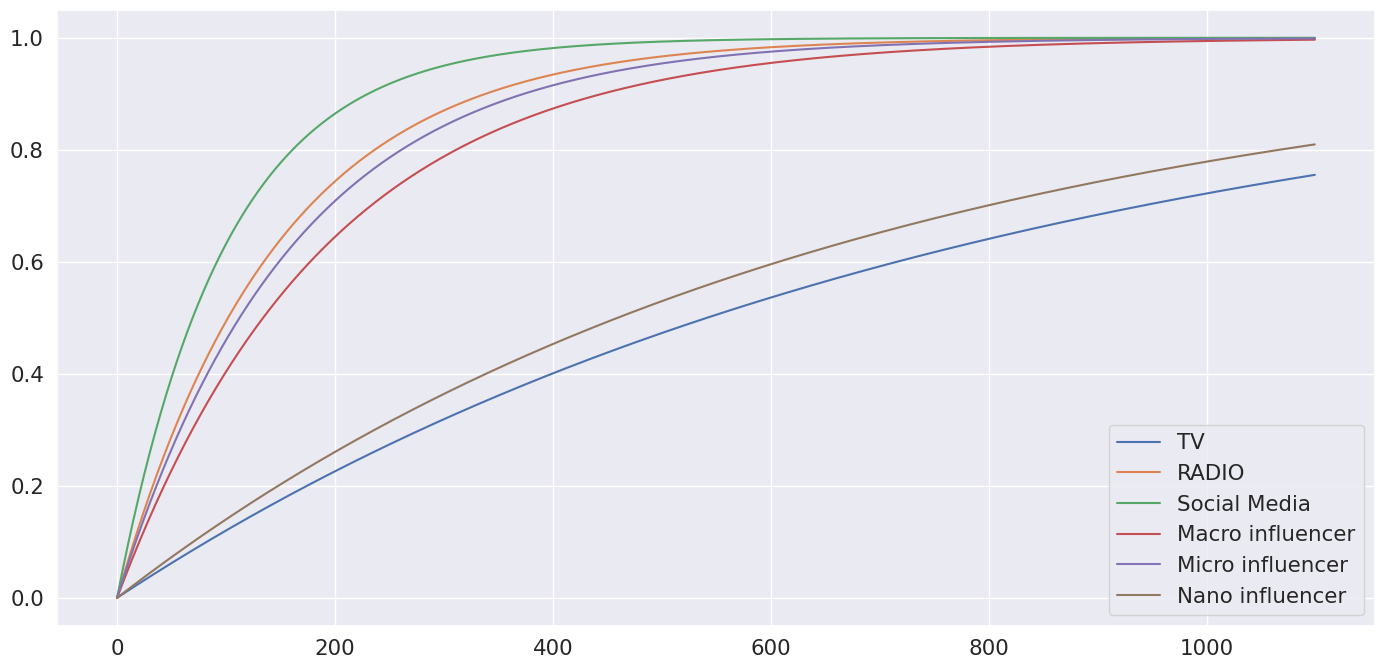

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(17,8))

plt.plot(range(0,1100),y_axis_TV, label='TV')
plt.plot(range(0,1100),y_axis_radio, label='RADIO')
plt.plot(range(0,1100),y_axis_Social_Media, label='Social Media')
plt.plot(range(0,1100),y_axis_Macro, label='Macro influencer')
plt.plot(range(0,1100),y_axis_Micro, label='Micro influencer')
plt.plot(range(0,1100),y_axis_Nano, label='Nano influencer')

plt.legend()
plt.show()

In the above chart, we are getting saturation graph of tv, radio, social media and other dummy influencers.

# Carryover Effects

> ### For TV

{0: 100}

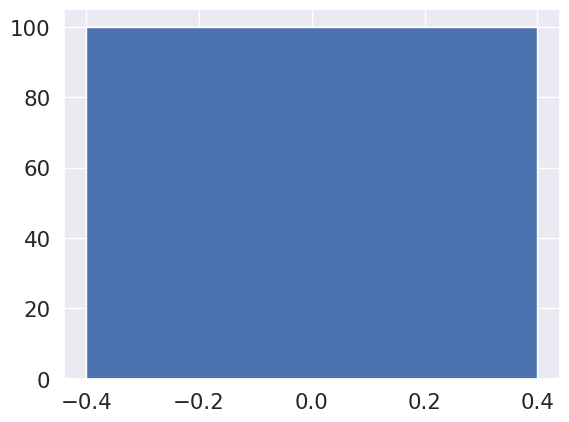

In [ ]:
tv_carry_week = int(value._get_value('adstock__tv_pipe__carryover__length', 'value'))
w=100
tv_carry_strength = value._get_value('adstock__tv_pipe__carryover__strength', 'value')
val={0:100}
for i in range(1,tv_carry_week+1):
  val[i] = w*tv_carry_strength
  w=w*tv_carry_strength

week_no = list(val.keys())
values = list(val.values())
plt.bar(week_no, values)
val

> ### For Radio

{0: 100,
 1: 34.84830516188324,
 2: 12.144043726557381,
 3: 4.231993416823254,
 4: 1.474777980325377}

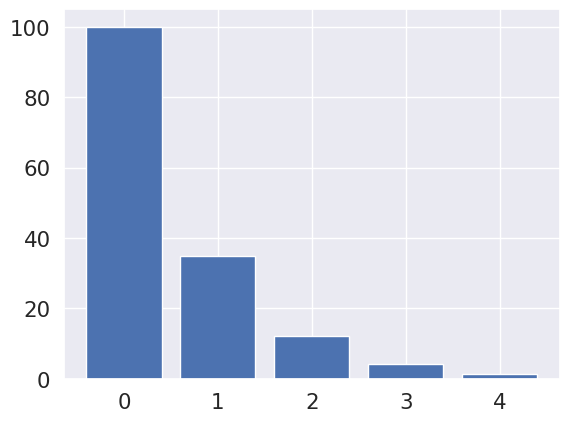

In [ ]:
radio_carry_week = int(value._get_value('adstock__radio_pipe__carryover__length', 'value'))
w=100
val={0:100}
radio_carry_strength = value._get_value('adstock__radio_pipe__carryover__strength', 'value')
for i in range(1,radio_carry_week+1):
  val[i] = w*radio_carry_strength
  w=w*radio_carry_strength

week_no = list(val.keys())
values = list(val.values())
plt.bar(week_no, values)
val

> ### For Social Media

{0: 100,
 1: 60.977787010553264,
 2: 37.182905087043984,
 3: 22.673312668313855,
 4: 13.825684307121213,
 5: 8.43059632954786,
 6: 5.140791073551216}

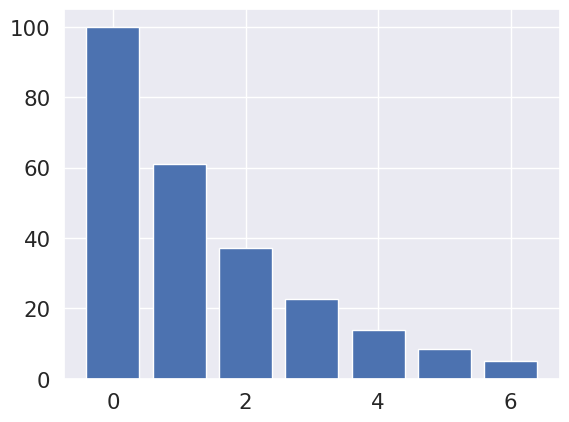

In [ ]:
Social_Media_carry_week = int(value._get_value('adstock__Social_Media_pipe__carryover__length', 'value'))
#Social_Media_carry_week = 6

w=100
Social_Media_carry_strength = value._get_value('adstock__Social_Media_pipe__carryover__strength', 'value')
val={0:100}

for i in range(1,Social_Media_carry_week+1):
  val[i] = w*Social_Media_carry_strength
  w=w*Social_Media_carry_strength

week_no = list(val.keys())
values = list(val.values())
plt.bar(week_no, values)
val

> ### For Macro Influencers

{0: 100,
 1: 81.97398213202243,
 2: 67.19733746581132,
 3: 55.08433340741898,
 4: 45.1548216249413}

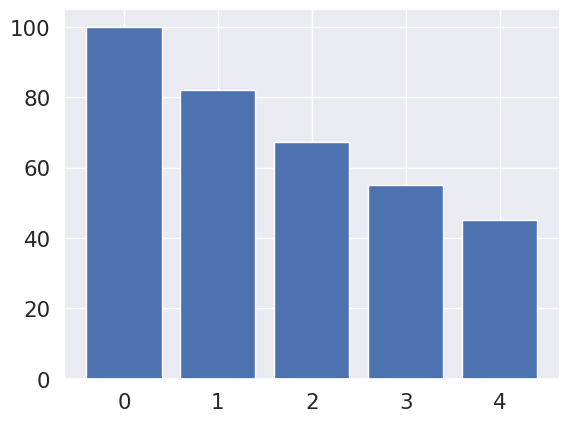

In [ ]:
Macro_carry_week = int(value._get_value('adstock__Macro_pipe__carryover__length', 'value'))

w=100
Macro_carry_strength = value._get_value('adstock__Macro_pipe__carryover__strength', 'value')
val={0:100}

for i in range(1,Macro_carry_week+1):
  val[i] = w*Macro_carry_strength
  w=w*Macro_carry_strength

week_no = list(val.keys())
values = list(val.values())
plt.bar(week_no, values)
val

- ### For Micro Influencers

{0: 100,
 1: 8.129526075111157,
 2: 0.660891942059122,
 3: 0.053727382758004844,
 4: 0.00436778159078678,
 5: 0.00035507994332691615}

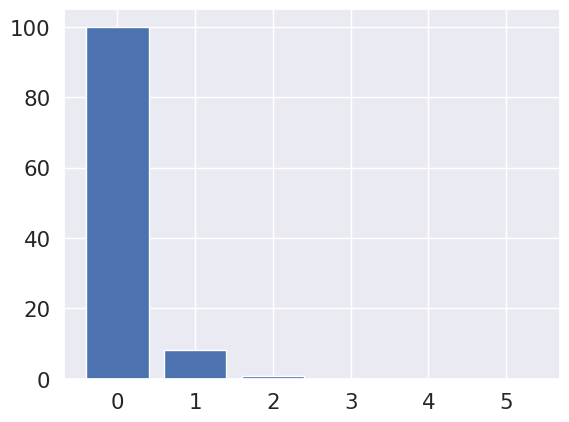

In [ ]:
Micro_carry_week = int(value._get_value('adstock__Micro_pipe__carryover__length', 'value'))

w=100
Micro_carry_strength = value._get_value('adstock__Micro_pipe__carryover__strength', 'value')
val={0:100}

for i in range(1,Micro_carry_week+1):
  val[i] = w*Micro_carry_strength
  w=w*Micro_carry_strength

week_no = list(val.keys())
values = list(val.values())
plt.bar(week_no, values)
val



> ### For Nano Influencers


{0: 100, 1: 54.76934665851415, 2: 29.99681333400495}

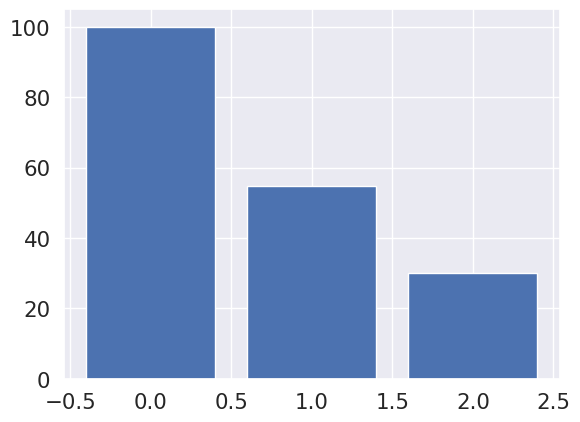

In [ ]:
Nano_carry_week = int(value._get_value('adstock__Nano_pipe__carryover__length', 'value'))

w=100
Nano_carry_strength = value._get_value('adstock__Nano_pipe__carryover__strength', 'value')
val={0:100}

for i in range(1,Nano_carry_week+1):
  val[i] = w*Nano_carry_strength
  w=w*Nano_carry_strength

week_no = list(val.keys())
values = list(val.values())
plt.bar(week_no, values)
val

It seems that radio and Social Media advertisings still have an effect on sales respectably 4 & 6 weeks later after the initial spending. This is longer than the effect of TV spendings that quickly wear off in the same week.

# Channel Contributions

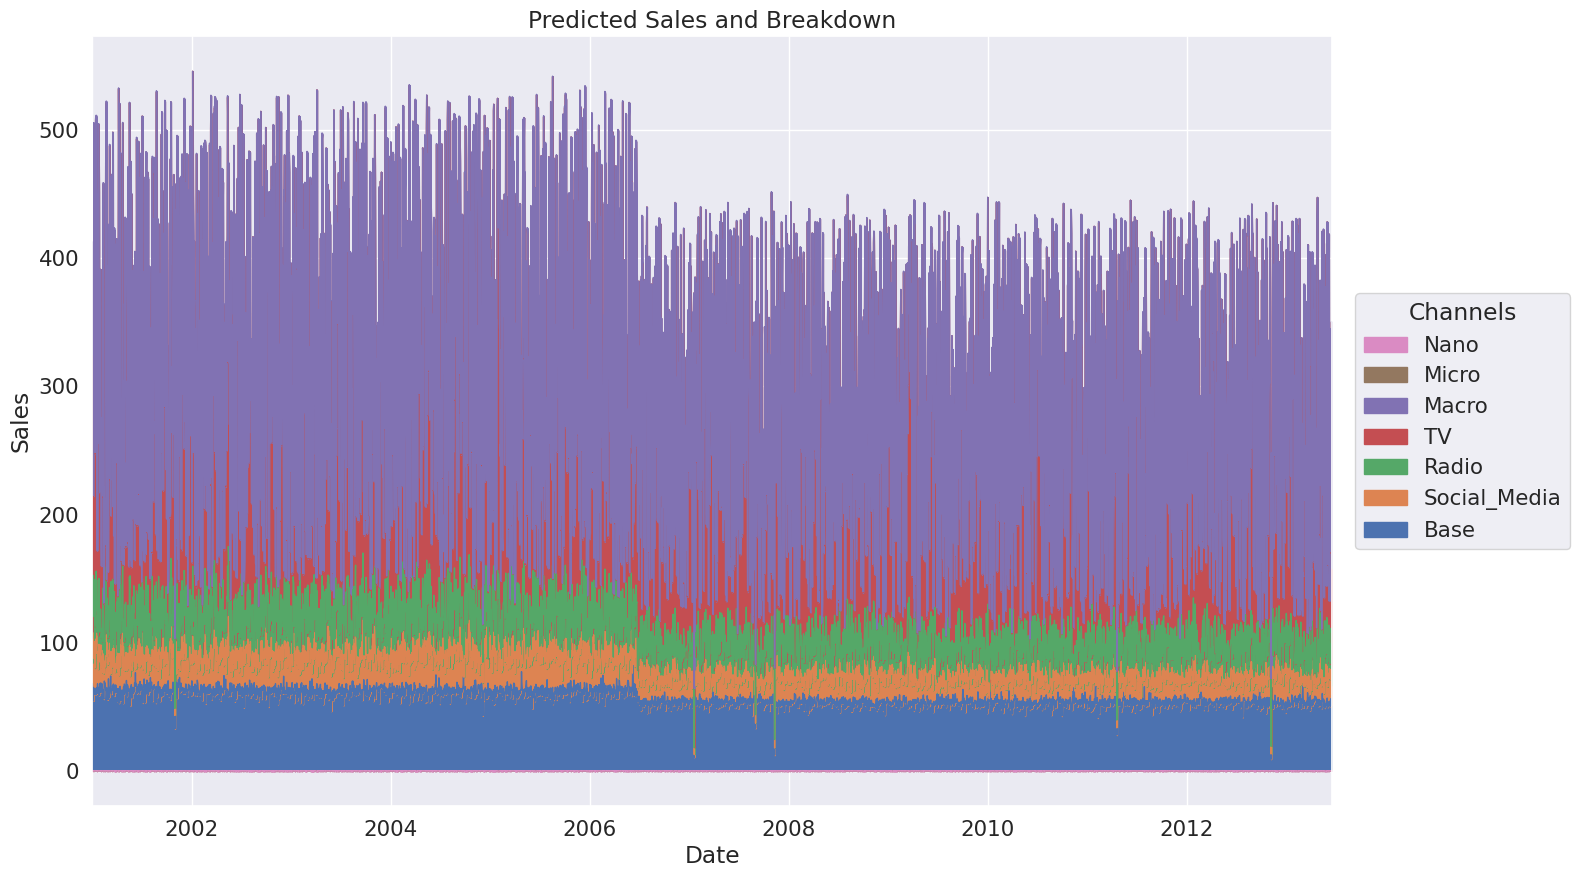

In [ ]:
adstock_data = pd.DataFrame(
    tuned_model.best_estimator_.named_steps['adstock'].transform(X2),
    columns=X2.columns,
    index=X2.index
)
weights = pd.Series(
    tuned_model.best_estimator_.named_steps['regression'].coef_,
    index=X2.columns
)
base = tuned_model.best_estimator_.named_steps['regression'].intercept_
unadj_contributions = adstock_data.mul(weights).assign(Base=base)
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    )
ax = (adj_contributions[['Base', 'Social_Media', 'Radio', 'TV', 'Macro', 'Micro', 'Nano']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date'
      )
     )

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

It seems Macro influencers have an higher impact on sales, even greater than TV which additionally still has an effect on sales 4 weeks later after initial spending.

# Comparing Actual and Predicted values

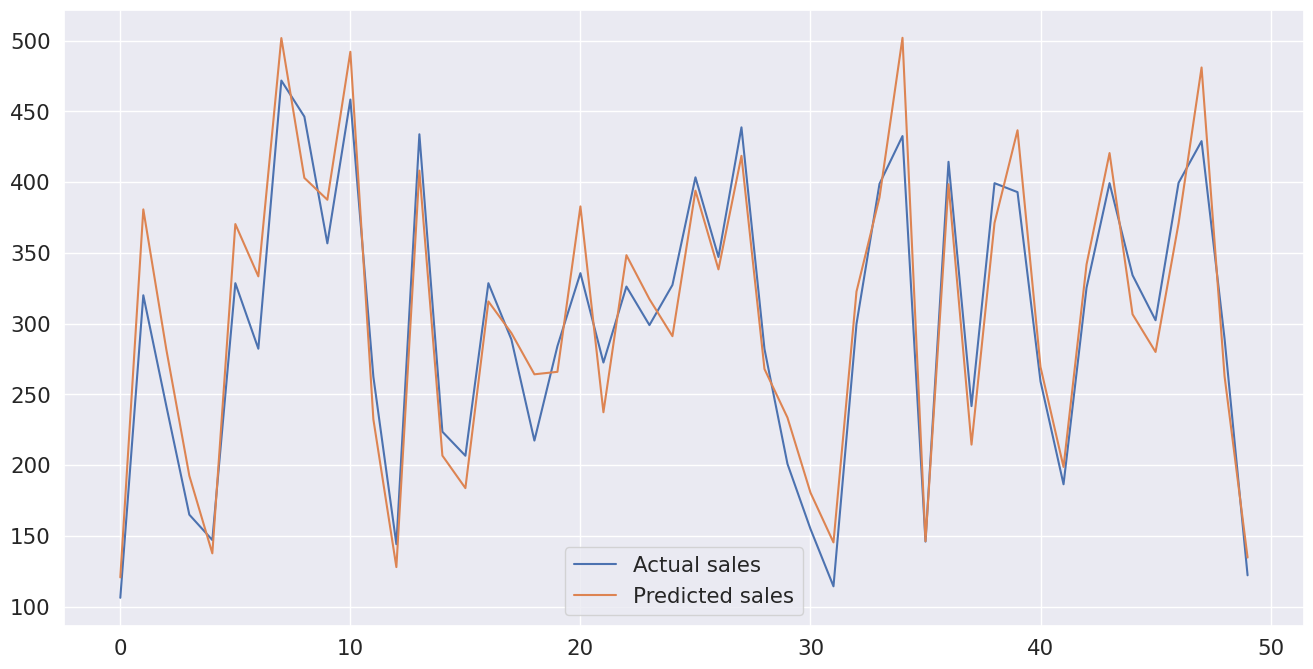

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2 ,test_size=0.35, random_state=101)
y_pred2 = tuned_model.predict(X_test3)
test3 = pd.DataFrame({'Predicted sales':y_pred2, 'Actual sales':y_test3})
fig= plt.figure(figsize=(16,8))
test3 = test3.reset_index()
test3 = test3.drop(['Date'],axis=1)
plt.plot(test3[:50])
plt.legend(['Actual sales','Predicted sales'])

# Checking For Multicollinearity using VIF values of the Explanatory Variables

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X3 = X2.copy()
X3['Constant'] = 1
vif = [variance_inflation_factor(X3.values, i) for i in range(len(X3.columns))]
pd.Series(vif, index=X3.columns)

TV              3.938138
Radio           4.592562
Social_Media    1.588171
Macro           1.485022
Micro           1.493019
Nano            1.489887
Constant        8.405170
dtype: float64

From the above results we can clearly see there is no Multicollinearity issue between the independent variables (all values are less than 5)

# Using docplex to implement Solver in Python
Solver adjusts the values in the decision variable cells to satisfy the limits on constraint cells and produce the result you want for the objective cell.
Ex: - Determining the monthly product mix for a drug manufacturing unit that maximizes the profitability.

- ## Scenario:
Suppose we are a big multimillion dollar company, we want to spread awareness  of our products to customers by placing advertisements through Tv, Radio and Social Media. But we have a tight budget of, lets say $100000. We want to maximize our revenue, but we don't know how much budget we should allocate to each channel. Thats where Solver comes in.

- ### Necessary Libraries

In [ ]:
!pip install docplex
!pip install cplex
from docplex.mp.model import Model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docplex: filename=docplex-2.25.236-py3-none-any.whl size=671350 sha256=f77bf8334a5dc57ae7ce3851b28b3b19bb4922cd9e7033bc4f629da9fb1e9f6a
  Stored in directory: /root/.cache/pip/wheels/3b/e5/00/0bf0173d67188fe73a13e3a61412b3f975f60205e3fab93a69
Successfully built docplex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 30.9 MB/s eta 0:00:00


In [ ]:
# Giving a model name
m = Model(name='Optimization_for_MMM')

Our Simple Linear Regression equation for the original data was:
> ### <b>Sales = 85.1463 + 3.4555 * TV + 0.98 * Radio + 2.469 * Social Media</b>

- ## Variables

In [ ]:
# Adding the variables as integers
TV = m.integer_var(name='TV')
Radio = m.integer_var(name='Radio')
SM = m.integer_var(name='Social_Media')

- ## Constraints

> ### TV

In [ ]:
# Adding constraints that Tv budget value should be non negative
TV_non_neg = m.add_constraint(TV >= 0)

> #### Radio

In [ ]:
# Adding maximum and minimum budget constraint to radio
Radio_Min = m.add_constraint(Radio >= 120)
Radio_Max = m.add_constraint(Radio <= 300)
Radio_non_neg = m.add_constraint(Radio >= 0)

> ### Social Media Constraints

In [ ]:
# Adding maximum and minimum budget constraint to Social Media
SM_Min = m.add_constraint(SM >= 100)
SM_Max = m.add_constraint(SM <= 230)
SM_non_neg = m.add_constraint(SM >= 0)

- ### Constraint on total ad Spent

In [ ]:
# Fixing Total budget constraint
Total_budget_max = m.add_constraint(m.sum([TV + Radio + SM]) <= 100000)

- ### Coefficients from Linear Regression

In [ ]:
TV_coef = 3.4555
Radio_coef = 0.98
SM_coef = 2.469
intercept = 85.1463

- ### Optimized Budget

In [ ]:
# Maximizing the Sales/Revenue through the intercept and coefficients of linear regression
m.maximize(TV*TV_coef + Radio*Radio_coef + SM*SM_coef + intercept)

In [ ]:
sol = m.solve()

In [ ]:
# Printing the result
sol.display()

solution for: Optimization_for_MMM
objective: 345239.436
status: OPTIMAL_SOLUTION(2)
TV = 99780
Radio = 120
Social_Media = 100


So, based on the results, if we have $100000 budget and we want to maximize our return of investment or objective, we should allocate 99780 dollars on Tv advertisements, 120 dollars on Radio advertisement and 100 dollars on Social Media advertisement.